# 결정 트리

여러개 모이면 앙상블  
과대적합이 많이 일어나는 특성.=>깊이 제한하여 통제해야함.  
보완하기 위해 앙상블로 만듬  
그리디 알고리즘  
원핫 인코딩, 정규화 표준화 필요 없음  
Grid Search : HyperParameter의 최적값을 구하기 위한 기능.    
HyperParameter : knn의 n_neighbors 값
교차검증 : tr과 te의 분할 과정에서 생기는 운빨을 최소화 시키기 위함.

### 결정트리 Decision Tree
트리 구조를 이용하여 데이터 사이에 존재하는 패턴을 예측 가능한 규칙들의 조합으로 나타내는 알고림즘  
분류와 회귀 모두 사용됨.  
분류의 경우 특성의 영역을 분할하면서 정보균일도가 높게 하도록 분할함.  
회귀의 경우 잔차 제곱합이 최소가 되도록 분할.  
엔트로피 : 주어진 데이터 집합의 혼잡도(지니 - 불순도)
정보이득지수 : 엔트로피지수(정보 이득이 높은 속성을 기준으로 분할 됨.)  
지니계수 : 주어진 데이터 집합의 불순도(값이 작을수록 데이터가 규일함.)
혼잡도 : 종류가 여러개
균일도 : 정보들의 일치도

트리구조
뿌리노드, 부모노드는 조건이 들어감. 잎사귀 노드(자식노드)는 결과(데이터)가 들어감.

In [ ]:
conda install python-graphviz

worst perimeter            0.725341
worst concave points       0.105163
worst texture              0.039385
mean texture               0.039330
worst area                 0.036872
area error                 0.009993
worst smoothness           0.009318
mean smoothness            0.008920
mean perimeter             0.007526
mean radius                0.006690
texture error              0.005017
fractal dimension error    0.004014
radius error               0.002431
dtype: float64

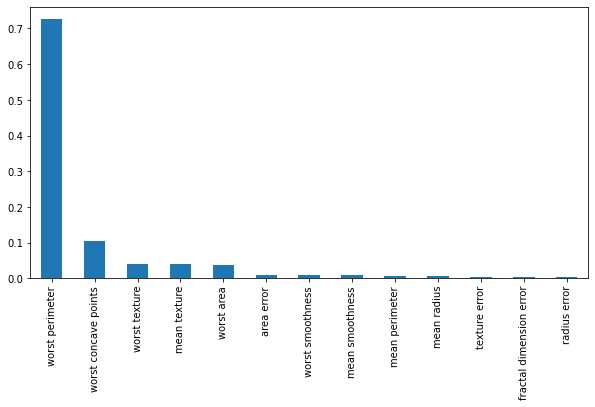

In [13]:
# 위스콘신 유방암 진단(이진분류)

from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# 데이터 블러오기 및 전처리
cancer = load_breast_cancer()

y = cancer['target']
x = cancer['data']

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(
    x,
    y,
    stratify=cancer['target'],
    random_state=0
)

# 모델링 및 평가
model = DecisionTreeClassifier().fit(x_tr,y_tr)

# 시각화
fi = pd.Series(model.feature_importances_,index=cancer['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
fi[fi!=0].sort_values(ascending=False)

In [2]:
model.get_depth()

5

In [3]:
# max_depth를 3으로 설정 => 결정 트리의 갯수가 3개
model3 = DecisionTreeClassifier(max_depth=3).fit(x_tr,y_tr)
model3.score(x_tr,y_tr), model3.score(x_te,y_te)

(0.9765258215962441, 0.916083916083916)

In [4]:
# max_depth를 7으로 설정 => 결정 트리의 갯수가 7개
model7 = DecisionTreeClassifier(max_depth=7).fit(x_tr,y_tr)
model7.score(x_tr,y_tr), model7.score(x_te,y_te)

(1.0, 0.9230769230769231)

max_depth가 커질수록 tr점수 높아짐. te는 비례하지만은 않음.

In [9]:
# 시각화 그래프 생성
export_graphviz(model, out_file='model.dot',
               feature_names=cancer['feature_names'],
               class_names=cancer['target_names'],
               impurity=True,
               filled=True
)

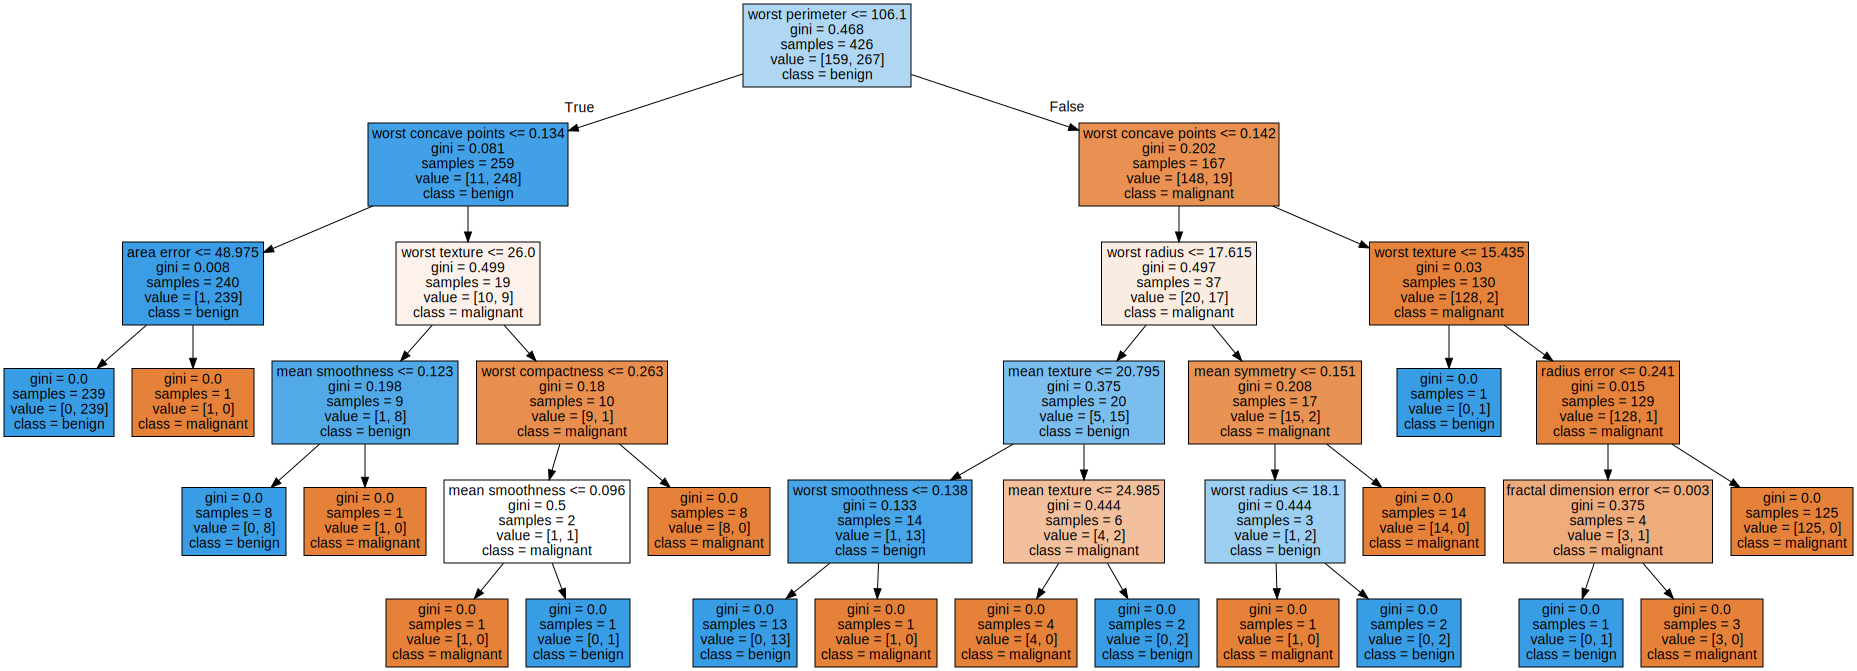

In [10]:
with open('model.dot') as f:
    data = f.read()
graphviz.Source(data)

In [11]:
# 시각화 그래프 생성
export_graphviz(model3, out_file='model3.dot',
               feature_names=cancer['feature_names'],
               class_names=cancer['target_names'],
               impurity=True,
               filled=True
)

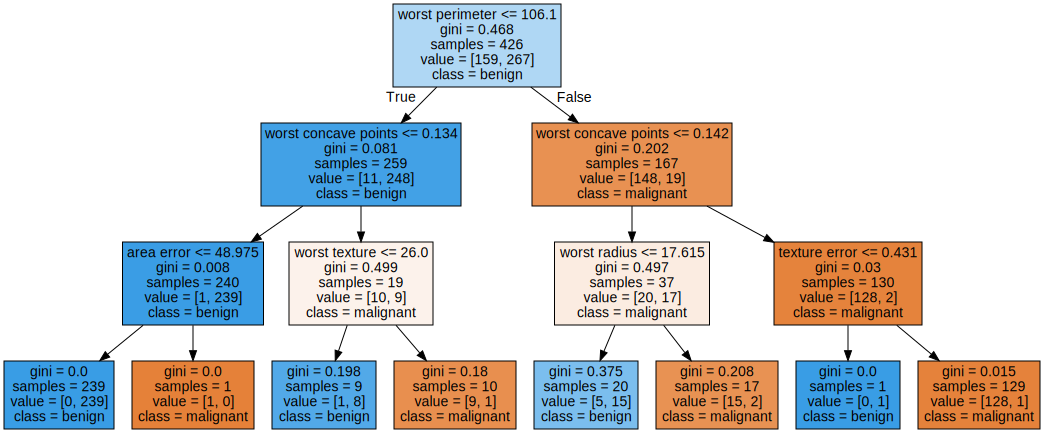

In [12]:
with open('model3.dot') as f:
    data = f.read()
graphviz.Source(data)

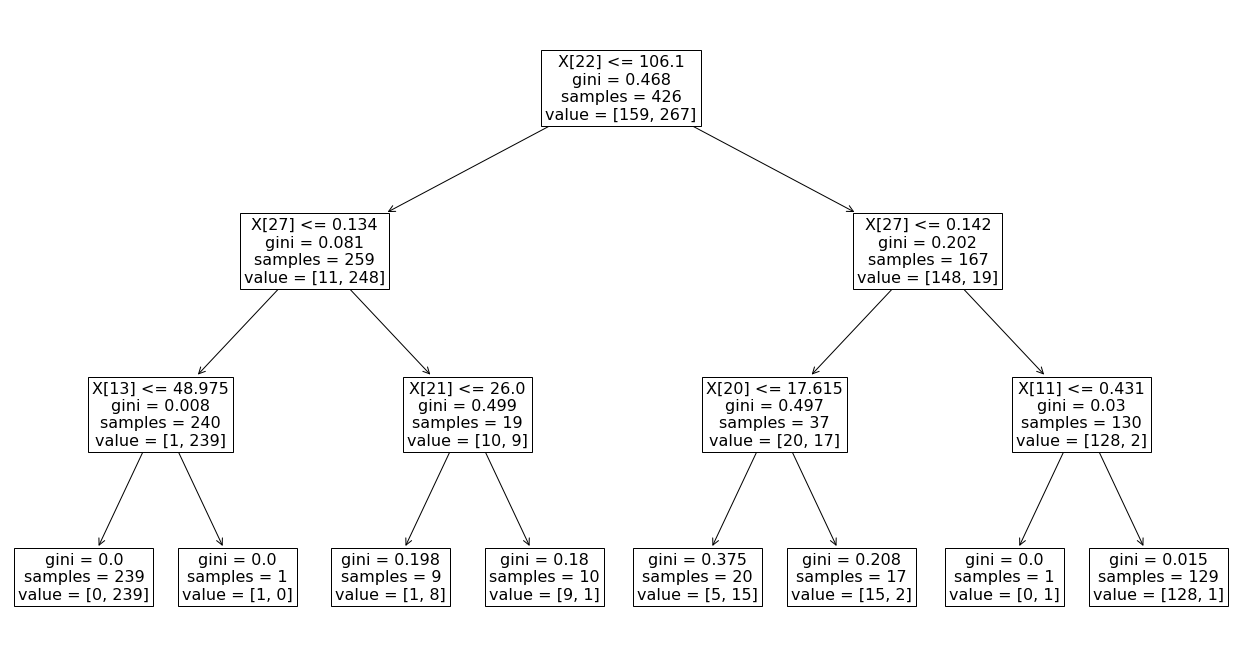

In [17]:
plt.figure(figsize=(22,12))
tree.plot_tree(model3, fontsize=16)
plt.show()

LSTAT      5.860000e-01
RM         2.408964e-01
CRIM       5.833689e-02
PTRATIO    3.100322e-02
DIS        2.940889e-02
TAX        1.428823e-02
B          1.157576e-02
NOX        1.083725e-02
INDUS      7.836610e-03
AGE        6.718029e-03
RAD        2.797901e-03
ZN         3.004778e-04
CHAS       3.092928e-07
dtype: float64

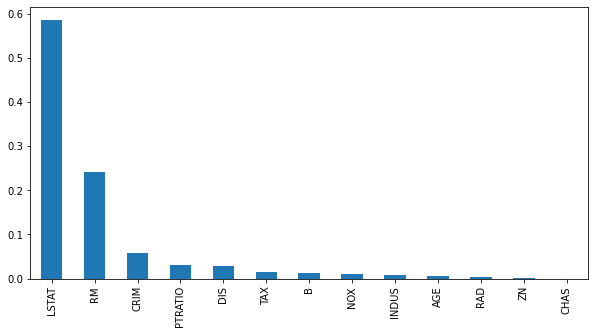

In [27]:
# 보스턴 집값
from warnings import filterwarnings
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor
from sklearn.tree import export_graphviz
from sklearn import tree
import graphviz
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

filterwarnings(action='ignore')

# 데이터 블러오기 및 전처리
boston = load_boston()

y = boston['target']
x = boston['data']

# 데이터 분할
x_tr, x_te, y_tr, y_te = train_test_split(
    x,
    y,
    random_state=0
)

# 모델링 및 평가
model = DecisionTreeRegressor().fit(x_tr,y_tr)

# 시각화
fi = pd.Series(model.feature_importances_,index=boston['feature_names'])
fi[fi!=0].sort_values(ascending=False).plot(kind='bar',figsize=(10,5))
fi[fi!=0].sort_values(ascending=False)


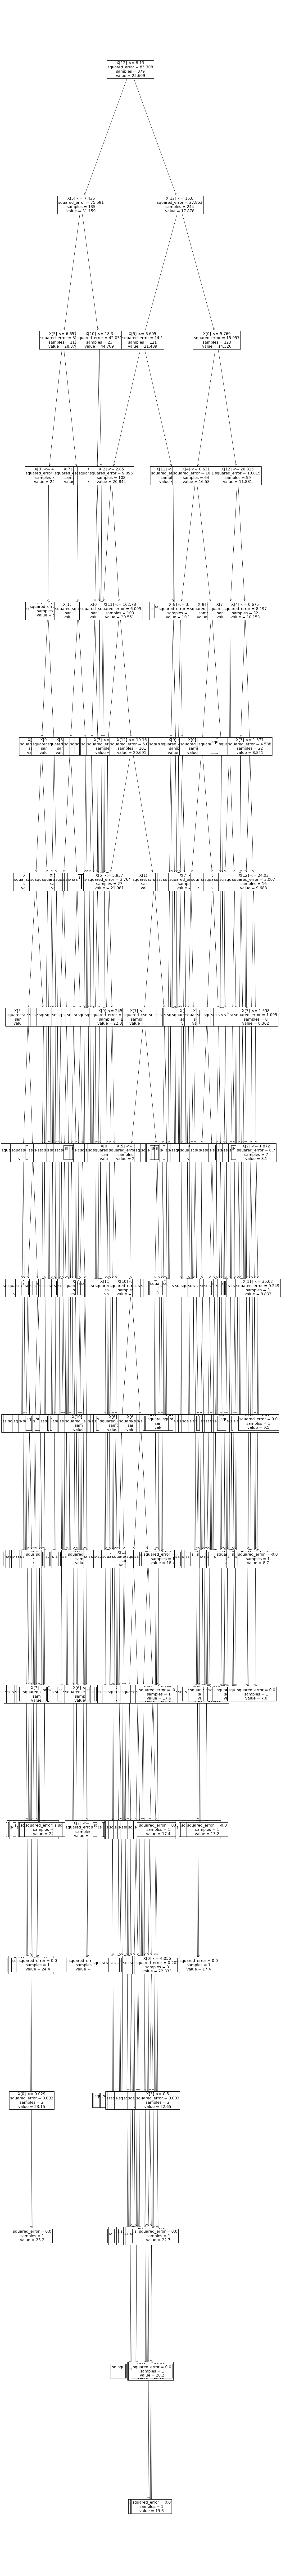

In [30]:
# 결정트리 시각화
plt.figure(figsize=(2^16,200))
tree.plot_tree(model, fontsize=16)
plt.show()